In [1]:
import matplotlib.pyplot as plt

from skimage import io, color
from skimage.transform import rescale, resize, downscale_local_mean

In [3]:
img = io.imread("./Downloads/archive (4)/Training/no_tumor/1.jpg", as_gray=True)

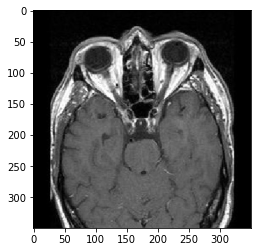

In [5]:
plt.imshow(img, cmap='gray')

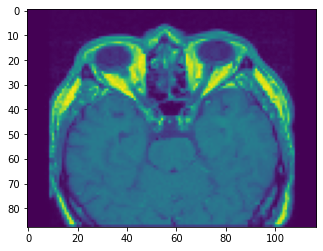

In [6]:
img_rescaled = rescale(img, 1.0 / 4.0, anti_aliasing=False)  #Check rescales image size in variable explorer
#Resize, resize image to given dimensions (shape)
img_resized = resize(img, (200, 200),               #Check dimensions in variable explorer
                       anti_aliasing=True)

#Downscale, downsample using local mean of elements of each block defined by user
img_downscaled = downscale_local_mean(img, (4, 3))
plt.imshow(img_downscaled)


In [ ]:
#Edge detection

In [7]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import roberts, sobel, scharr, prewitt

(350, 350)


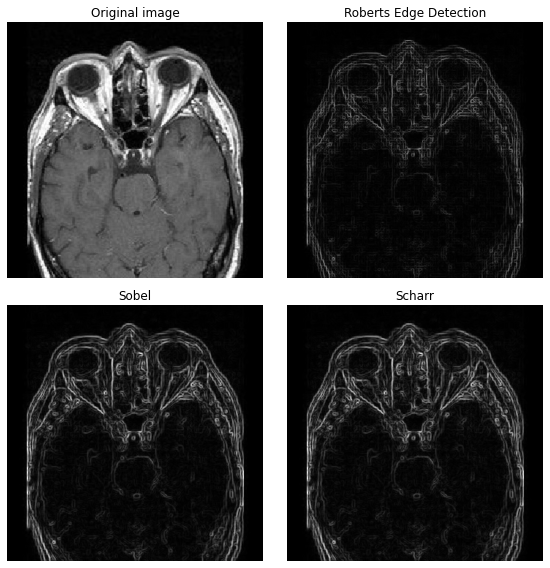

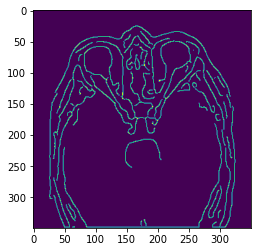

In [9]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import roberts, sobel, scharr, prewitt

img = io.imread("./Downloads/archive (4)/Training/no_tumor/1.jpg", as_gray=True)  #Convert to grey scale
print(img.shape)
#plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')

edge_roberts = roberts(img)
#plt.imshow(edge_roberts, cmap=plt.cm.gray, interpolation='nearest')
edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)


fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(edge_roberts, cmap=plt.cm.gray)
ax[1].set_title('Roberts Edge Detection')

ax[2].imshow(edge_sobel, cmap=plt.cm.gray)
ax[2].set_title('Sobel')

ax[3].imshow(edge_scharr, cmap=plt.cm.gray)
ax[3].set_title('Scharr')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

#Another edge filter is Canny. This is not just a single operation
#It does noise reduction, gradient calculation, and edge tracking among other things. 
#Canny creates a binary file, true or false pixels. 
from skimage import feature
edge_canny = feature.canny(img, sigma=3)
plt.imshow(edge_canny)


In [13]:
#Image deconvolution
#Uses deconvolution to sharpen images. 

import matplotlib.pyplot as plt
from skimage import io, color, restoration, img_as_float

img = img_as_float(io.imread("./Downloads/archive (4)/Training/no_tumor/1.jpg"))
print(img.shape)

#PSF
import scipy.stats as st
import numpy as np
def gkern(kernlen=21, nsig=2):    #Returns a 2D Gaussian kernel.

    lim = kernlen//2 + (kernlen % 2)/2
    x = np.linspace(-lim, lim, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

psf = gkern(5,3)   #Kernel length and sigma
print(psf)




(350, 350, 3)
[[0.003765   0.015019   0.02379159 0.015019   0.003765  ]
 [0.015019   0.05991246 0.0949073  0.05991246 0.015019  ]
 [0.02379159 0.0949073  0.15034262 0.0949073  0.02379159]
 [0.015019   0.05991246 0.0949073  0.05991246 0.015019  ]
 [0.003765   0.015019   0.02379159 0.015019   0.003765  ]]


In [29]:
#Let's find a way to calculate the area of scratch in would healing assay
#Entropy filter
#e.g. scratch assay where you have rough region with cells and flat region of scratch.
#entropy filter can be used to separate these regions

import matplotlib.pyplot as plt
from skimage import io, color, restoration, img_as_float

img = io.imread("./Downloads/archive (4)/Training/no_tumor/1.jpg")
print(img.shape)

from skimage.filters.rank import entropy
from skimage.morphology import disk
img = np.squeeze(img)
entropy_img = entropy(img, disk(10))
plt.imshow(entropy_img, cmap='gray')

#Once you have the entropy iamge you can apply a threshold to segment the image
#If you're not sure which threshold works fine, skimage has a way for you to check all 

# from skimage.filters import try_all_threshold
# fig, ax = try_all_threshold(entropy_img, figsize=(10, 8), verbose=False)
# plt.show()

(350, 350, 3)


ValueError: Image dimensions and neighborhood dimensionsdo not match

(350, 350, 3)
90.99378824234009


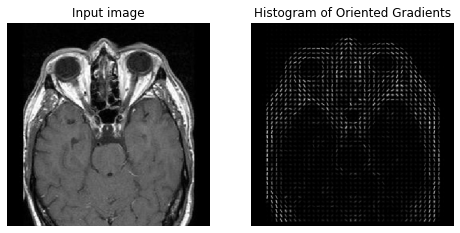

In [17]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from skimage import io, color, restoration, img_as_float
from skimage.feature import hog
from skimage import data, exposure

img = io.imread("./Downloads/archive (4)/Training/no_tumor/1.jpg", as_gray=False)
print(img.shape)

fd, hog_image = hog(img, orientations=12, pixels_per_cell=(8, 8), cells_per_block=(2, 2), 
                    visualize=True, multichannel=True)
print(hog_image.max())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 50))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()